<a href="https://colab.research.google.com/github/WesleyZanon/Desenvolvimento-de-Sistemas-de-IA-para-An-lise-e-Previs-o-de-Dados-no-Kaggle/blob/main/Desenvolvimento_de_Sistemas_de_IA_para_An%C3%A1lise_e_Previs%C3%A3o_de_Dados_no_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte 1: Tarefa de Regressão




Seleção de dados : Predição de idade de caranguejos

>

---





Modelo Árvore de Decisão

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

cb = pd.read_csv('CrabAgePrediction.csv', sep=',', index_col=None)    # Carregando o conjunto de dados Crab Age Prediction
cb = shuffle(cb, random_state = 47)                                   # Embaralhamento dos dados

colunas = cb.columns.tolist() # Cria uma lista com o nome das colunas do dataset
colunas.remove('Age')         # Remove da lista o elemento "Cut" (Coluna alvo)
colunas.remove('Length')      # Remove da lista o elemento "Length"

X = cb[colunas] # Matriz de características (dados)
y = cb['Age']   # Vetor de rótulos (Idade)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)   # Dividindo o conjunto de dados em treinamento e teste
regressor = DecisionTreeRegressor() # Criando um regressor de árvore de decisão
regressor.fit(X_train, y_train)     # Treinando o regressor com os dados de treinamento

y_pred = regressor.predict(X_test)  # Fazendo previsões com o conjunto de teste

# Avaliando o desempenho do modelo usando o erro quadrado médio
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Erro quadrado médio do modelo: {mse}')
print("Coeficiente de determinação (R-squared):", r2)
print(f'MAE: {mae}')

# Plotando os resultados do modelo
plt.plot(y_test, y_pred, 'o')
plt.xlabel('Idade real')
plt.ylabel('Idade prevista')
plt.title('Resultados do modelo de árvore de decisão')
plt.show()

# Visualização da árvore de decisão
print("\n\n")
dot_data = export_graphviz(regressor, out_file=None, feature_names=colunas, filled=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Gere um arquivo PDF da árvore de decisão

# Exibindo a importância das características
feature_importance = regressor.feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(colunas, feature_importance)
plt.xlabel('Importância das Características')
plt.title('Importância das Características no Modelo')
plt.show()



ValueError: ignored

Erro quadrado médio do modelo: 5.097783583156333
Coeficiente de determinação (R-squared): 0.48601625713028196
MAE: 1.564149872696512


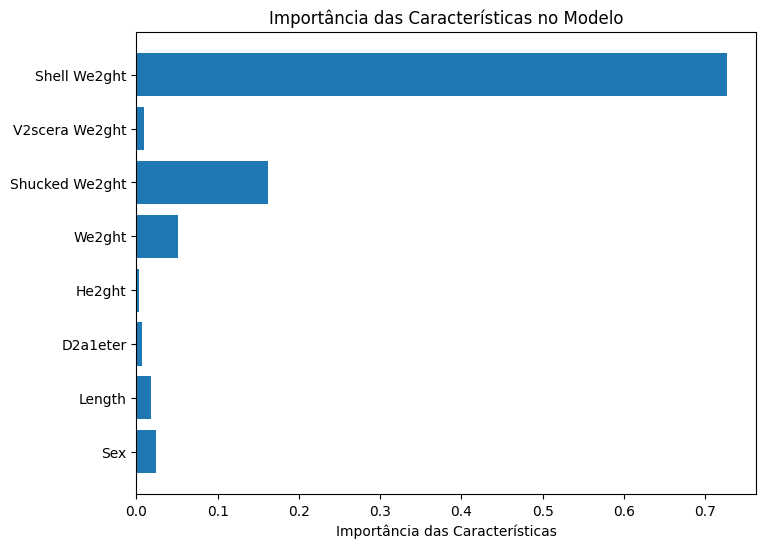

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Carregando o conjunto de dados Crab Age Prediction
cb = pd.read_csv('CrabAgePrediction.csv', sep=',', index_col=None)

# Embaralhando os dados
cb = cb.sample(frac=1, random_state=47)

colunas = cb.columns.tolist() # Cria uma lista com o nome das colunas do dataset
colunas.remove('Age')         # Remove da lista o elemento "Cut" (Coluna alvo)

X = cb[colunas] # Matriz de características (dados)
y = cb['Age']   # Vetor de rótulos (Idade)

# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando um regressor de árvore de decisão
regressor = DecisionTreeRegressor(random_state=42)

# Ajustando a profundidade da árvore (hiperparâmetro)
params = {'max_depth': range(1, 21)}
grid_search = GridSearchCV(regressor, params, cv=5)
grid_search.fit(X_train, y_train)
best_depth = grid_search.best_params_['max_depth']

# Treinando o regressor com a profundidade otimizada
regressor = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
regressor.fit(X_train, y_train)

# Fazendo previsões com o conjunto de teste
y_pred = regressor.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Erro quadrado médio do modelo: {mse}')
print(f"Coeficiente de determinação (R-squared): {r2}")
print(f'MAE: {mae}')

# Visualização da árvore de decisão (requer a biblioteca graphviz)
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(regressor, out_file=None, feature_names=colunas, filled=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Gere um arquivo PDF da árvore de decisão

# Exibindo a importância das características
feature_importance = regressor.feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(colunas, feature_importance)
plt.xlabel('Importância das Características')
plt.title('Importância das Características no Modelo')
plt.show()



Modelo Regressão Linear

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle


# usar keras

cb = pd.read_csv('CrabAgePrediction.csv') # Carregando o conjunto de dados Crab Age Prediction
cb = shuffle(cb, random_state = 47)       # Embaralhamento dos dados

colunas = cb.columns.tolist()   # Cria uma lista com o nome das colunas do dataset
colunas.remove('Age')           # Remove da lista o elemento "Age" (Coluna alvo)
colunas.remove('Length')        # Remove da lista o elemento "Length"
colunas.remove('Shell We2ght')  # Remove da lista o elemento "Shell We2ght"

X = cb[colunas]   # Matriz de características (dados)
y = cb.Age        # Vetor de rótulos (corte)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Divisão dos dados em conjuntos de treinamento e teste
model = LinearRegression()                # Cria o modelo de regressão linear
model.fit(X_train, y_train)               # Treina o modelo nos dados de treinamento
y_pred = model.predict(X_test)            # Realiza previsões nos dados de teste
mse = mean_squared_error(y_test, y_pred)  # Avalia o desempenho do modelo
r2 = r2_score(y_test, y_pred)             # Calcula o coeficiente de determinação

print("Erro quadrático médio (MSE):", mse)               # Printa o MSE
print("Coeficiente de determinação (R-squared):", r2)    # Printa o coeficiente de determinação


Erro quadrático médio (MSE): 4.406685407507782
Coeficiente de determinação (R-squared): 0.55569619179521


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# Carregando o conjunto de dados
cb = pd.read_csv('CrabAgePrediction.csv')

# Embaralhando os dados
cb = cb.sample(frac=1, random_state=47)

# Selecionando as colunas de recursos e rótulo
features = ['Sex', 'Length', 'D2a1eter', 'He2ght','We2ght','Shucked We2ght','V2scera We2ght','Shell We2ght', 'Age']
target = 'Age'  # Coluna alvo

X = cb[features].values
y = cb[target].values

# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criando o modelo Keras
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Ativação linear para problemas de regressão

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Realizando previsões nos dados de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotando os resultados do modelo
plt.plot(y_test, y_pred, 'o')
plt.xlabel('Idade real')
plt.ylabel('Idade prevista')
plt.title('Resultados do modelo de regressão linear')
plt.show()
print("Erro quadrático médio (MSE):", mse)
print("Coeficiente de determinação (R-squared):", r2)


Epoch 1/100
86/86 [==============================] - 1s 2ms/step - loss: 61.5524
Epoch 2/100
86/86 [==============================] - 0s 2ms/step - loss: 12.6172
Epoch 3/100
86/86 [==============================] - 0s 2ms/step - loss: 3.6246
Epoch 4/100
86/86 [==============================] - 0s 2ms/step - loss: 1.8743
Epoch 5/100
86/86 [==============================] - 0s 2ms/step - loss: 1.2706
Epoch 6/100
86/86 [==============================] - 0s 2ms/step - loss: 0.9121
Epoch 7/100
86/86 [==============================] - 0s 2ms/step - loss: 0.6507
Epoch 8/100
86/86 [==============================] - 0s 2ms/step - loss: 0.4475
Epoch 9/100
86/86 [==============================] - 0s 2ms/step - loss: 0.2926
Epoch 10/100
86/86 [==============================] - 0s 2ms/step - loss: 0.1911
Epoch 11/100
86/86 [==============================] - 0s 2ms/step - loss: 0.1236
Epoch 12/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0816
Epoch 13/100
86/86 [===============

Modelo de Redes Neurais

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt

crab = pd.read_csv('CrabAgePrediction.csv') #importa o dataSet

features = crab.columns.tolist()

#Remove a coluna alvo
features.remove('Age')

#Atribui todas as outras colunas
X = crab[features]

#Atribui a coluna alvo
y = crab.Age

#print(X)
#print(y)

#Divide os conjuntos em porções diferentes de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#Processo de normalização utilizado, ao obter a média e a variância do conjunto, utilizando o método adapt, para utilizar na criação das camadas
normalizer = preprocessing.Normalization()
normalizer.adapt(X_train.values)

#Criação do modelo e suas camadas
model = keras.Sequential([
    normalizer,
    layers.Dense(9, activation = 'relu'),
    layers.Dense(7, activation='relu'),
    layers.Dense(5, activation='relu'),
    layers.Dense(1)
])

model.summary()

#Compilação do modelo criado
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics = ['mean_squared_error', 'mean_absolute_percentage_error', 'cosine_proximity'])

#Realiza propriamente o treino do modelo
history = model.fit(
    X_train, y_train,
    epochs=300,
    validation_split = 0.2,
    batch_size=32,
    verbose=0
    )

#Gera as previsões para os determinados valores de entrada
y_pred = model.predict(X_test).reshape(-1)

#Retorna os valores de perda e as métricas definidas pelo modelo
resultado = model.evaluate(X_test, y_test, verbose=1)
print('perda: ', resultado[0])
print('Erro quadrático médio: ', resultado[1] )
print('Erro percentual absoluto médio: ', resultado[2] )
print('Similaridade por cosseno: ', resultado[3] )

#Médias de ambos os conjuntos originais e de previsão
y_test.mean()
y_pred.mean()



     Sex  Length  D2a1eter  He2ght     We2ght  Shucked We2ght  V2scera We2ght  \
0      0  1.4375    1.1750  0.4125  24.635715       12.332033        5.584852   
1      1  0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2      2  1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3      0  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4      2  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   
...   ..     ...       ...     ...        ...             ...             ...   
3888   0  1.4625    1.1375  0.3250  24.819987       11.651644        5.854172   
3889   0  1.5500    1.2125  0.4375  34.458817       15.450477        7.172423   
3890   I  0.6250    0.4625  0.1625   2.012815        0.765436        0.524466   
3891   2  1.0625    0.7750  0.2625  10.347568        4.507570        2.338834   
3892   2  0.7875    0.6125  0.2125   4.068153        1.502523        1.346601   

      Shell We2ght  
0     

ValueError: ignored

#Parte 2: Tarefa de Classificação

Seleção de dados: Melhor corte de um diamante

---



Modelo Naive Bayes

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dm = pd.read_csv('diamonds.csv', sep= ',', index_col = None)  # Lê o dataset

colunas = dm.columns.tolist()    # Cria uma lista com o nome das colunas do dataset
colunas.remove('cut')            # Remove da lista o elemento "Cut" (Coluna alvo)
colunas.remove('price')          # Remove a coluna price
colunas.remove('carat')          # Remove a coluna carat
colunas.remove('x')              # Remove a coluna x
colunas.remove('y')              # Remove a coluna y
colunas.remove('z')              # Remove a coluna z

X = dm[colunas]   # Matriz de características (dados)
y = dm.cut        # Vetor de rótulos (corte)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Monta o conjunto de dados para teste e treino
model = GaussianNB()                         # Cria modelo de classificação
model.fit(X_train, y_train)                  # Treina o modelo com os dados de treino
y_pred = model.predict(X_test)               # Utiliza modelo treinado para previsões
accuracy = accuracy_score(y_test, y_pred)    # Calcula a acurácia das previsões com as classes verdadeiras

print(f'Acurácia: {accuracy:.2f}')           # Printa acurácia

Acurácia: 0.65


Acurácia: 0.65


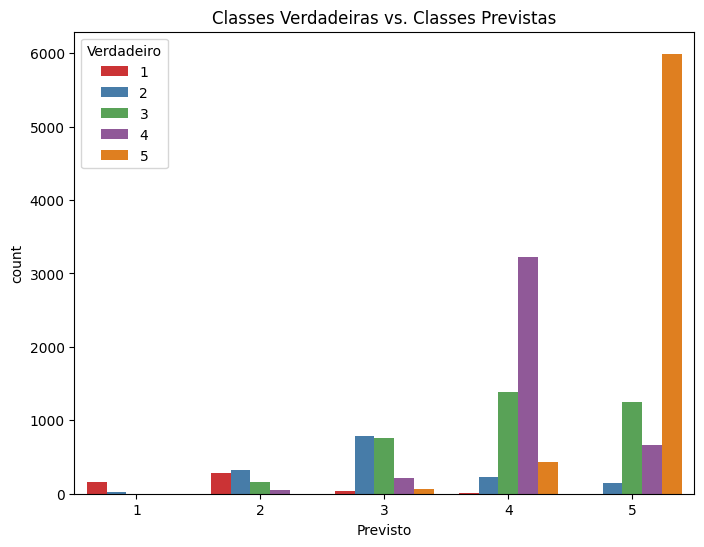

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o conjunto de dados
dm = pd.read_csv('diamonds.csv', sep=',', index_col=None)

# Selecionar as colunas de recursos
colunas = dm.columns.tolist()
colunas.remove('cut')
colunas.remove('price')
colunas.remove('carat')
colunas.remove('x')
colunas.remove('y')
colunas.remove('z')

X = dm[colunas]
y = dm.cut

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo de Naive Bayes
model = GaussianNB()

# Treinar o modelo
model.fit(X_train, y_train)

# Realizar previsões
y_pred = model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

# Gráfico de Barras das Classes Verdadeiras e Previstas
plt.figure(figsize=(8, 6))
sns.countplot(data=pd.DataFrame({'Verdadeiro': y_test, 'Previsto': y_pred}), x='Previsto', hue='Verdadeiro', palette='Set1')
plt.title('Classes Verdadeiras vs. Classes Previstas')
plt.show()


Modelo KNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

dm = pd.read_csv('diamonds.csv', sep=',', index_col=None)
dm = shuffle(dm, random_state = 47)

colunas = dm.columns.tolist()
colunas.remove('cut')
colunas.remove('price')
colunas.remove('carat')
colunas.remove('x')
colunas.remove('y')
colunas.remove('z')

X = dm[colunas]
y = dm['cut']


#atribuir variaveis de testes e treinos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Aplicar imputação KNN aos dados (preencher valores faltantes)
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Aplicar método KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_imputed, y_train)
y_pred = knn.predict(X_test_imputed)

# Avaliar a acurácia do modelo
print("Acurácia:", metrics.accuracy_score(y_test, y_pred))

# Plotando os resultados do modelo
plt.plot(y_test, y_pred, 'o')
plt.xlabel('Corte real')
plt.ylabel('Corte previsto')
plt.title('Resultados do modelo KNN')
plt.show()

Acurácia: 0.6897787665307131


Modelo de Redes Neurais

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

diamonds = pd.read_csv('diamonds.csv')

from sklearn.model_selection import train_test_split

#for variavel in ['cut', 'color', 'clarity']:
#  diamonds[variavel] = LabelEncoder().fit_transform(diamonds[variavel])

atributos = diamonds.columns.tolist() #Listagem de todas as colunas do dataSet
atributos.remove('cut') #Remoção da coluna 'cut'

X = diamonds[atributos] #Atribuição de todas as colunas de separadas da coluna alvo
y = diamonds.cut #Atribuição da coluna alvo

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state=42) #Função de separação das listas obtidas com o dataSet, dividando em conjuntos de treino e de teste

label_encoder = LabelEncoder() #Transformação dos dados nominais em dados numéricos para a coluna alvo
y_treino_encoded = label_encoder.fit_transform(y_treino)
y_teste_encoded = label_encoder.transform(y_teste)

y_treino_onehot = to_categorical(y_treino_encoded, num_classes=5)#Modificação de classes de números inteiros para matriz binéria, para utilização do parâmetro categorical_crossentropy
y_teste_onehot = to_categorical(y_teste_encoded, num_classes=5)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


normalizer = preprocessing.Normalization()
normalizer.adapt(X_treino.values) #Calcula a media e variância do conjunto em questão

modelo = keras.Sequential([ #Criação do modelo a ser utilizado e suas camadas
    normalizer,
    layers.Dense(9, activation='tanh'),

    layers.Dense(7, activation='tanh'),

    layers.Dense(5, activation='softmax')
])

modelo.summary()

#Compila o modelo criado
modelo.compile(optimizer='adam',
              loss='categorical_crossentropy')

#Treina o modelo criado com os determinados parâmetros
history = modelo.fit(
    X_treino, y_treino_onehot,
    epochs=200,
    validation_split = 0.2,
    batch_size=10,
    verbose=0
    )

#Realiza a previsão dos dados
y_pred = modelo.predict(X_teste)

from sklearn.metrics import accuracy_score

y_pred_encoded = np.argmax(y_pred, axis=1)  # Obter a classe prevista (índice)
accuracy = accuracy_score(y_teste_encoded, y_pred_encoded) #Calcula a acurácia
#accuracy = accuracy_score(y_teste, y_pred_encoded)

print(accuracy)

#print(y_teste_encoded)
#print(y_teste)
#print(y_pred_encoded)

#accuracy_score(y_pred, y_teste_encoded)
#accuracy_score(y_pred, y_teste)